In [1]:
import pandas as pd
import numpy as np
import json
from datetime import date
import calendar
import networkx as nx



dic_month={"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
# df2=pd.read_excel("INDIA.XLSX")
# dic={}
# df2
# df2=df2.loc[(df2['Unnamed: 5'] == "All ages") & (df2["Unnamed: 4"]=="Total")& (df2["Unnamed: 6"]=="Total")]
# df2
# for index, row in df2.iterrows():
#     dic[row["Unnamed: 3"].lstrip("State -")[0:-5].upper()]=row["Unnamed: 7"]
# dic.pop("")
# #dic THIS THING ABOVE MAKES A DICT OF MIGRATION, LETS CHANGE IT TO POPULATION
# dic["DELHI NCT"]=dic["NCT OF DELHI"]
# dic["JAMMU AND KASHMIR"]=dic["JAMMU & KASHMIR"]
# dic["SIKKIM"]=dic["IKKIM"]
# dic.pop("IKKIM")
# dic.pop("JAMMU & KASHMIR")
# dic.pop("NCT OF DELHI")
# dic


df2=pd.read_excel("INDIA.XLSX")
dic={}
df2
df2=df2.loc[(df2['Unnamed: 5'] == "All ages") & (df2["Unnamed: 4"]=="Total")& (df2["Unnamed: 6"]=="Total")]
df2
for index, row in df2.iterrows():
    dic[row["Unnamed: 3"].lstrip("State -").upper()]=row["Unnamed: 7"]

dic
dic["DELHI NCT"]=dic["DELHI"]
                            # dic["JAMMU AND KASHMIR"]=dic["JAMMU & KASHMIR"]
dic["SIKKIM"]=dic["IKKIM"]
dic.pop("IKKIM")
dic.pop("DELHI")
dic.pop("INDIA")
print(dic)



df=pd.read_csv("Scraped.csv")
x=df["5"][6]
print(x)
df
passengers=[]
for i in range(len(df)):
    temp=0
    x=df["18"][i]
    x=x.replace("EOG","")
    #x=x.strip('][').split(',')
    if(len(x)>8):
        for j in x:
            if (j.startswith("D")):
                temp+=106
            if (j.startswith("H")):
                temp+=22
            if (j.startswith("B")):
                temp+=72
            if (j.startswith("S") or j.startswith("C")):
                temp+=80
            if (j.startswith("A") or j.startswith("E")):
                temp+=54
        if temp==0:
            print(x)
            y=x
        passengers.append(temp)
passengers=list(filter(lambda a: a != 0, passengers))


def df_states(df):
    for i in range(len(df)):
        x=df["19"][i]
        x=x.strip('][').split(',')
        for j in range(1,len(x),2):
            print(x[j])
#df_states(df)




def create():
    lis=[*dic]
    df=pd.DataFrame(data=0,columns=lis, index = lis)
    return df
dfG=create()
def get_passengers(x):
    temp=0
    x=x.replace("EOG","")
    #x=x.strip('][').split(',')
    if(len(x)>8):
        for j in x:
            if (j.startswith("D")):
                temp+=106
            if (j.startswith("H")):
                temp+=22
            if (j.startswith("B")):
                temp+=72
            if (j.startswith("S") or j.startswith("C")):
                temp+=80
            if (j.startswith("A") or j.startswith("E")):
                temp+=54
    if temp>0:
        return temp
    else:
        return 1590
def get_weekdays(string):
    string=string.replace(" ","")
    #print(len(string), string)
    return len(string)
def separator(string):
    string=string[4:]
    dm,year=string.split(",")
    return dm,year[1:]

def checkruns_weight(row):      #Assumption: The end date is not in 2022. And the start date is either in 2020 or 2021
    s=row[21]
    e=row[22]
    days=0
#     TS=date(2020,5,1)
#     TE=date(2020,7,31)
#     TS=date(2020,8,1)
#     TE=date(2020,10,31)

    print(s,e)
    try:
        s,years=separator(s)
        e,yeare=separator(e)
        #
        sm,sd=s.split(" ")
        em,ed=e.split(" ")
        #
        sm=dic_month[sm]
        em=dic_month[em]
        #
        date_s=date(int(years),int(sm),int(sd))
        date_e=date(int(yeare),int(em),int(ed))
        #
        #days=date_e-date_s
        if(TS>date_s):
            CS=TS
        else:
            CS=date_s
        if(TE>date_e):
            CE=date_e
        else:
            CE=TE
        
        days=CE-CS
        
    except Exception as e:
        print(e)
        days=date(2021,6,10)-date(2021,6,10)
#         try:
#             sm,sd=s.split(" ")
#             sm=dic_month[sm]
#             date_e=date(2021,6,10)
#             date_s=date(2021,int(sm),int(sd))
#             days=date_e-date_s
#         except:
#             days=date(2021,6,10)-date(2021,6,10)


    days=days.days
    if(days<0):
        days=0
    runs=days/7*get_weekdays(row[14])*get_passengers(row[19])
    print(days,runs)
    return runs
                #
#get_weekdays(df.loc[0][14])
#get_passengers(df.loc[1][19])
def separator(string):
    string=string[4:]
    dm,year=string.split(",")
    return dm,year[1:]
checkruns_weight(df.loc[0])


{'ANDAMAN AND NICOBAR ISLANDS': 381, 'ANDHRA PRADESH': 84581, 'ARUNACHAL PRADESH': 1384, 'ASSAM': 31206, 'BIHAR': 104099, 'CHANDIGARH': 1055, 'CHHATTISGARH': 25545, 'DADRA AND NAGAR HAVELI': 344, 'DAMAN AND DIU': 243, 'GOA': 1459, 'GUJARAT': 60440, 'HARYANA': 25351, 'HIMACHAL PRADESH': 6865, 'JAMMU AND KASHMIR': 12541, 'JHARKHAND': 32988, 'KARNATAKA': 61095, 'KERALA': 33406, 'LAKSHADWEEP': 64, 'MADHYA PRADESH': 72627, 'MAHARASHTRA': 112374, 'MANIPUR': 2856, 'MEGHALAYA': 2967, 'MIZORAM': 1097, 'NAGALAND': 1979, 'ODISHA': 41974, 'PUDUCHERRY': 1248, 'PUNJAB': 27743, 'RAJASTHAN': 68548, 'TAMIL NADU': 72147, 'TRIPURA': 3674, 'UTTAR PRADESH': 199812, 'UTTARAKHAND': 10086, 'WEST BENGAL': 91276, 'DELHI NCT': 16788, 'SIKKIM': 611}
Jul 01
['  L', '', ' G1', ' G2', ' G3', ' G4', ' G5', ' G6', ' G7', ' G8', ' G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', '']
['  L', '', 'G18', 'G17', 'G16', 'G15', 'G14', 'G13', 'G12', 'G11', 'G10', ' G9', ' G8', ' G7', ' G6', ' G5', ' G4', ' 

0.0

Ernakulam - Gorakhpur Special Fare Special
['KERALA', 'TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
Mon Jun 21, 2021 Thu Jul 01, 2021
4 908.5714285714286
Kalka - New Delhi Shatabdi Special
['HARYANA', 'CHANDIGARH', 'DELHI NCT']
Mon Jun 21, 2021 nan
'float' object is not subscriptable
0 0.0
New Delhi - Kalka Shatabdi Special
['DELHI NCT', 'HARYANA', 'CHANDIGARH']
Mon Jun 21, 2021 nan
'float' object is not subscriptable
0 0.0
Amritsar - New Delhi Swarna Jayanti Shatabdi Special
['PUNJAB', 'HARYANA', 'DELHI NCT']
Fri Jul 02, 2021 nan
'float' object is not subscriptable
0 0.0
New Delhi - Amritsar Swarna Jayanti Shatabdi Special
['DELHI NCT', 'HARYANA', 'PUNJAB']
Fri Jul 02, 2021 nan
'float' object is not subscriptable
0 0.0
Shri Shakti AC SF Special
['DELHI NCT', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
Fri Jul 02, 2021 nan
'float' object is not subscriptable
0 0.0
Shri Shakti AC SF Special
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'DELHI 

Jodhpur - Bhopal Special
['RAJASTHAN', 'MADHYA PRADESH']
Fri Jun 18, 2021 nan
'float' object is not subscriptable
0 0.0
Bhopal - Jodhpur Special
['MADHYA PRADESH', 'RAJASTHAN']
Sat Jun 19, 2021 nan
'float' object is not subscriptable
0 0.0
Mumbai Central - Samastipur Summer Special Fare Special
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
Mon Jun 07, 2021 Mon Jun 21, 2021
14 16576.0
Samastipur - Ahmedabad Summer Special Fare Special
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
Wed Jun 09, 2021 Thu Jun 17, 2021
8 1817.142857142857
Bhagalpur - Mumbai Central Special Fare Special
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
Sat Jun 12, 2021 Mon Jun 21, 2021
9 2044.2857142857144
Danapur - Vadodara Special Fare Special (via Mathura)
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
Thu Jun 10, 2021 Sat Jun 19, 2021
9 2044.2857142857144
New Delhi - Rajgir Clone Special
['D

0 0.0
Nanda Devi AC Special
['UTTARAKHAND', 'UTTAR PRADESH', 'DELHI NCT', 'RAJASTHAN']
Mon Jun 14, 2021 nan
'float' object is not subscriptable
0 0.0
Nanda Devi AC Special
['RAJASTHAN', 'UTTAR PRADESH', 'DELHI NCT', 'UTTARAKHAND']
Tue Jun 15, 2021 nan
'float' object is not subscriptable
0 0.0
Chitrakoot Special
['UTTAR PRADESH', 'MADHYA PRADESH']
Fri Jun 11, 2021 nan
'float' object is not subscriptable
0 0.0
Barauni - Lucknow Jn. Special
['BIHAR', 'UTTAR PRADESH']
Thu Jun 10, 2021 nan
'float' object is not subscriptable
0 0.0
Udhampur - Prayagraj SF Summer Special
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'UTTAR PRADESH']
Tue Jun 15, 2021 Wed Jun 23, 2021
8 2146.285714285714
Chitrakoot Special
['MADHYA PRADESH', 'UTTAR PRADESH']
Sat Jun 12, 2021 nan
'float' object is not subscriptable
0 0.0
Prayagraj - Udhampur SF Summer Special
['UTTAR PRADESH', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
Mon Jun 14, 2021 Tue Jun 22, 2021
8 2146.285714285714
Ajmer - Agra Fort InterCity Special
['RAJAST

Saharsa - Bandra Terminus Humsafar Festival Special
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'GUJARAT']
Tue Oct 27, 2020 Thu Jul 01, 2021
241 49026.28571428572
Koyna Special
['MAHARASHTRA']
Mon Oct 12, 2020 Mon May 17, 2021
217 332444.0
Koyna Special
['MAHARASHTRA']
Tue Oct 13, 2020 Tue May 18, 2021
217 332444.0
Danapur - Pune SF Summer Special Fare Special
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Fri May 14, 2021 Wed May 19, 2021
5 2271.4285714285716
Pune - Danapur SF Summer Special Fare Special
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
Wed May 12, 2021 Tue May 18, 2021
6 2725.714285714286
Gorakhpur - Mumbai LTT Special Fare Special (via Banda)
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Sun May 16, 2021 Mon May 17, 2021
1 227.14285714285714
Mumbai LTT - Gorakhpur Special Fare Special (via Banda)
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
Fri May 14, 2021 Sun May 16, 2021
2 454.2857142857143
Nandigram Special
['TEL

Dadar Central - Manduadih Summer Special
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
Sun Apr 11, 2021 Mon May 10, 2021
29 26348.57142857143
Banaswadi - Ernakulam SF Special
['KARNATAKA', 'TAMIL NADU', 'KERALA']
Tue Apr 06, 2021 Fri Apr 30, 2021
24 10902.857142857143
Gorakhpur -Mumbai CSMT Special Fare Special
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Thu Apr 29, 2021 Sat May 08, 2021
9 4088.571428571429
Katihar - Delhi Special
['BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
Sun May 02, 2021 Mon May 03, 2021
1 227.14285714285714
Mumbai CSMT - Gorakhpur Special Fare Special
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
Wed Apr 28, 2021 Fri May 07, 2021
9 4088.571428571429
Mangaluru Central - Madgaon DEMU Express Special
['KARNATAKA', 'GOA']
Mon Apr 12, 2021 Wed Apr 28, 2021
16 21805.714285714286
Madgaon - Mangaluru Central DEMU Express Special
['GOA', 'KARNATAKA']
Mon Apr 12, 2021 Wed Apr 28, 2021
16 21805.714285714286
Mumbai CSMT - Karmali Tejas Special
['MAHARASHTRA', 'GOA

0 0.0
Jaipur - Suratgarh Express Special
['RAJASTHAN']
Sat Apr 10, 2021 nan
'float' object is not subscriptable
0 0.0
Phulera - Jaipur Passenger Special
['RAJASTHAN']
Wed Apr 14, 2021 nan
'float' object is not subscriptable
0 0.0
Jaipur - Phulera Passenger Special
['RAJASTHAN']
Sat Apr 10, 2021 nan
'float' object is not subscriptable
0 0.0
Anupgarh - Suratgarh Passenger Special
['RAJASTHAN']
Sun Apr 11, 2021 nan
'float' object is not subscriptable
0 0.0
Suratgarh - Anupgarh Passenger Special
['RAJASTHAN']
Sun Apr 11, 2021 nan
'float' object is not subscriptable
0 0.0
Agra Cantt. - Kolkata Weekly Special (via Lucknow)
['UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
Sat Apr 17, 2021 Sun Jun 27, 2021
69 16146.0
Kolkata - Agra Cantt. Weekly Special (via Lucknow)
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH']
Thu Apr 15, 2021 Fri Jun 25, 2021
71 17425.42857142857
Lal Kuan - Howrah Weekly SF Special
['UTTARAKHAND', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
Sat Apr 

Nagercoil -Tambaram Antyodaya Special (via Mayiladuturai)
['TAMIL NADU']
Tue Apr 27, 2021 nan
'float' object is not subscriptable
0 0.0
Mangaluru Central - Puducherry Weekly Special (Via Salem)
['KARNATAKA', 'KERALA', 'PUDUCHERRY', 'TAMIL NADU']
Fri Apr 16, 2021 nan
'float' object is not subscriptable
0 0.0
Banaswadi - Ernakulam SF Special
['KARNATAKA', 'TAMIL NADU', 'KERALA']
Mon Apr 12, 2021 nan
'float' object is not subscriptable
0 0.0
Ernakulam - Banaswadi SF Special
['KERALA', 'TAMIL NADU', 'KARNATAKA']
Sun Apr 11, 2021 nan
'float' object is not subscriptable
0 0.0
MGR Chennai Central - Coimbatore Weekly SF Special
['TAMIL NADU']
Sat Apr 17, 2021 nan
'float' object is not subscriptable
0 0.0
Coimbatore - MGR Chennai Central Weekly SF Special
['TAMIL NADU']
Fri Apr 16, 2021 nan
'float' object is not subscriptable
0 0.0
Mahal Superfast Special
['TAMIL NADU']
Sat Apr 17, 2021 nan
'float' object is not subscriptable
0 0.0
Hazrat Nizamuddin - MGR Chennai Central Garib Rath Special
['DE

Baidyanathdham Special Fare Special
['ODISHA', 'WEST BENGAL', 'JHARKHAND', 'BIHAR']
Mon Oct 26, 2020 Tue Jun 29, 2021
242 52617.71428571428
Baidyanathdham Special Fare Special
['BIHAR', 'JHARKHAND', 'WEST BENGAL', 'ODISHA']
Wed Oct 28, 2020 Thu Jul 01, 2021
240 52182.857142857145
Manduadih - Sambalpur Special Fare Special
['UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'ODISHA']
Thu Oct 22, 2020 Fri Jul 02, 2021
246 117939.42857142858
Sambalpur - Manduadih Special Fare Special
['ODISHA', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH']
Wed Oct 21, 2020 Thu Jul 01, 2021
247 118418.85714285714
Howrah - Sambalpur Weekly SF Special Fare Special
['WEST BENGAL', 'ODISHA']
Sat Oct 24, 2020 Sun Jun 27, 2021
244 55980.57142857142
Sambalpur - Howrah Weekly SF Special Fare Special
['ODISHA', 'WEST BENGAL']
Fri Oct 23, 2020 Sat Jun 26, 2021
245 56210.0
Bhubaneswar - Mumbai LTT Special Fare SF Special
['ODISHA', 'CHHATTISGARH', 'MAHARASHTRA']
Thu Oct 22, 2020 Tue Jun 29, 2021
246 117096.00000000001
Odisha Sampark Kr

['ODISHA', 'JHARKHAND', 'UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'CHANDIGARH', 'PUNJAB', 'JAMMU AND KASHMIR']
nan nan
'float' object is not subscriptable
0 0.0
Alappuzha - Dhanbad Special
['KERALA', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'JHARKHAND']
nan nan
'float' object is not subscriptable
0 0.0
Krishna Festival Special
['ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
0 0.0
Azad Hind SF Special (PT)
['MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
0 0.0
Dhanbad - Alappuzha Special (PT)
['JHARKHAND', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KERALA']
nan nan
'float' object is not subscriptable
0 0.0
Santragachi - Habibganj Weekly Humsafar Special
['WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH', 'MADHYA PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
Habibganj - Santragachi Weekly Humsafar Special
['MADHYA PRADESH', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'W

Kota - Patna Special (via Sultanpur)
['RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
nan nan
'float' object is not subscriptable
0 0.0
Aman Lodge - Matheran Shuttle (NG Hill Train)
['MAHARASHTRA']
Wed Nov 04, 2020 nan
'float' object is not subscriptable
0 0.0
Matheran - Aman Lodge Shuttle (NG Hill Train)
['MAHARASHTRA']
Wed Nov 04, 2020 nan
'float' object is not subscriptable
0 0.0
Aman Lodge - Matheran Shuttle (NG Hill Train)
['MAHARASHTRA']
Sat Nov 14, 2020 nan
'float' object is not subscriptable
0 0.0
Matheran - Aman Lodge Shuttle (NG Hill Train)
['MAHARASHTRA']
Sat Nov 14, 2020 nan
'float' object is not subscriptable
0 0.0
Silchar - Dibrugarh Special
['ASSAM']
Sun May 02, 2021 nan
'float' object is not subscriptable
0 0.0
Netaji SF Special (PT)
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'CHANDIGARH']
nan nan
'float' object is not subscriptable
0 0.0
Tinsukia - Lumding Special
['ASSAM']
nan nan
'float' object is not subscriptable
0 0.0
Lumding - Tinsukia 

Mahanagri SF Special (PT)
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
Mahanagri SF Special
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
0 0.0
Howrah - Bikaner SF Special (Via Agra Fort) (PT)
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'RAJASTHAN']
nan nan
'float' object is not subscriptable
0 0.0
Kamayani Special
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
Golconda COVID - 19 Special
['ANDHRA PRADESH', 'TELANGANA']
nan nan
'float' object is not subscriptable
0 0.0
Ahmedabad - Howrah SF Special (PT)
['GUJARAT', 'MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
0 0.0
Golconda COVID - 19 Special
['TELANGANA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
Howrah - Ahmedabad SF Special (PT)
['WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHAT

New Delhi - Prayagraj Humsafar Special
['DELHI NCT', 'UTTAR PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
Gorakhpur - Yesvantpur SF Special (PT)
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'KARNATAKA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
Yesvantpur - Gorakhpur SF Special
['KARNATAKA', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
Jaipur - Mysuru Special (PT)
['RAJASTHAN', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH', 'KARNATAKA']
nan nan
'float' object is not subscriptable
0 0.0
Gorakhpur - Anand Vihar Terminal Humsafar Special (Via Barhni)
['UTTAR PRADESH', 'DELHI NCT']
nan nan
'float' object is not subscriptable
0 0.0
Mysuru - Jaipur Special
['KARNATAKA', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'RAJASTHAN']
nan nan
'float' object is not subscriptable
0 0.0
Anand Vihar Terminal - Gorakhpur Humsa

['MADHYA PRADESH', 'CHHATTISGARH']
nan nan
'float' object is not subscriptable
0 0.0
Jodhpur - Howrah SF Special (PT)
['RAJASTHAN', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
0 0.0
Ananthapuri Special
['TAMIL NADU', 'KERALA']
nan nan
'float' object is not subscriptable
0 0.0
Ananthapuri Special
['KERALA', 'TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
Chennai Egmore - Madurai Tejas COVID-19 Special
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
Madurai - Chennai Egmore Tejas COVID-19 Special
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
Pothigai SF Special
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
Pothigai SF Special
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
Nellai SF Special
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
Nellai SF Special
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
Sethu COVID-

Tirupati - Amravati Bi-weekly Festival Special
['ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
0 0.0
Amravati - Tirupati Bi-weekly Festival Special
['MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
Vijayawada - Hubballi Amaravati Festival Special
['ANDHRA PRADESH', 'KARNATAKA']
nan nan
'float' object is not subscriptable
0 0.0
Hubballi - Vijayawada Amaravati Festival Special
['KARNATAKA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
Gowthami SF Special Fare Special
['TELANGANA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
MGR Chennai Central - Madurai SF Special
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
Madurai - MGR Chennai Central SF Special
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
MGR Chennai Central - Hazrat Nizamuddin Duronto Special
['TAMIL NADU', 'ANDHRA PRADESH', 'MAHARASHTRA', 'MADHYA PRADESH', '

Thiruvananthapuram Central - Veraval Special
['KERALA', 'KARNATAKA', 'GOA', 'MAHARASHTRA', 'GUJARAT']
nan nan
'float' object is not subscriptable
0 0.0
Veraval - Thiruvananthapuram Central Special (PT)
['GUJARAT', 'MAHARASHTRA', 'GOA', 'KARNATAKA', 'KERALA']
nan nan
'float' object is not subscriptable
0 0.0
Mumbai LTT - Coimbatore Special (PT)
['MAHARASHTRA', 'KARNATAKA', 'TELANGANA', 'ANDHRA PRADESH', 'TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
Coimbatore - Mumbai LTT Special
['TAMIL NADU', 'KARNATAKA', 'ANDHRA PRADESH', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
0 0.0
Punjab Mail Special (PT)
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'RAJASTHAN', 'HARYANA', 'DELHI NCT', 'PUNJAB']
nan nan
'float' object is not subscriptable
0 0.0
Jhelum Special (PT)
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'RAJASTHAN', 'HARYANA', 'DELHI NCT', 'PUNJAB', 'JAMMU AND KASHMIR']
nan nan
'float' object is not subscriptable
0 0.0
Jhelum Special
['JAMMU AN

KSR Bengaluru - New Tinsukia SF Special (PT)
['KARNATAKA', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'WEST BENGAL', 'BIHAR', 'ASSAM']
nan nan
'float' object is not subscriptable
0 0.0
Howrah - Chakradharpur Express Special
['WEST BENGAL', 'JHARKHAND']
nan nan
'float' object is not subscriptable
0 0.0
Chakradharpur - Howrah Express Special
['JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
0 0.0
Howrah - Bokaro Steel City Express Special
['WEST BENGAL', 'JHARKHAND']
nan nan
'float' object is not subscriptable
0 0.0
Bokaro Steel City - Howrah Express Special
['JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
0 0.0
Kamakhya - Mumbai LTT Karmabhoomi SF Special (PT)
['ASSAM', 'WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
0 0.0
Mumbai LTT - Kamakhya Karmabhoomi SF Special (PT)
['MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL', 'ASSAM']
nan nan
'float' object is no

Kacheguda - Yelahanka Special
['TELANGANA', 'ANDHRA PRADESH', 'KARNATAKA']
nan nan
'float' object is not subscriptable
0 0.0
Yelahanka - Kacheguda Express Special
['KARNATAKA', 'ANDHRA PRADESH', 'TELANGANA']
nan nan
'float' object is not subscriptable
0 0.0
Udyog Nagri Special
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
Udyog Nagri Special
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
0 0.0
Kacheguda - Mangaluru Central Festival Special
['TELANGANA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KERALA', 'KARNATAKA']
nan nan
'float' object is not subscriptable
0 0.0
Patna - Kota Special (via Faizabad)
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN']
nan nan
'float' object is not subscriptable
0 0.0
Chennai Egmore - Puducherry Special
['TAMIL NADU', 'PUDUCHERRY']
nan nan
'float' object is not subscriptable
0 0.0
Puducherry - Chennai Egmore Special
['PUDUCHERRY', 'TAMIL NADU']
nan nan
'float' object is no

Howrah - Mathura Chambal SF Special
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'RAJASTHAN']
Fri Apr 02, 2021 nan
'float' object is not subscriptable
0 0.0
Kochuveli - Yog Nagari Rishikesh SF Special
['KERALA', 'KARNATAKA', 'GOA', 'MAHARASHTRA', 'GUJARAT', 'RAJASTHAN', 'DELHI NCT', 'UTTAR PRADESH', 'UTTARAKHAND']
Fri Apr 16, 2021 nan
'float' object is not subscriptable
0 0.0
Yog Nagari Rishikesh - Kochuveli SF Special
['UTTARAKHAND', 'UTTAR PRADESH', 'DELHI NCT', 'RAJASTHAN', 'GUJARAT', 'MAHARASHTRA', 'GOA', 'KARNATAKA', 'KERALA']
Mon Apr 19, 2021 nan
'float' object is not subscriptable
0 0.0
MGR Chennai Central - Coimbatore Shatabdi Special
['TAMIL NADU']
Sat Apr 10, 2021 Wed Apr 28, 2021
18 24531.428571428576
Coimbatore - MGR Chennai Central Shatabdi Special
['TAMIL NADU']
Sat Apr 10, 2021 Wed Apr 28, 2021
18 24531.428571428576
Kochuveli - Mumbai LTT Garib Rath Special
['KERALA', 'KARNATAKA', 'GOA', 'MAHARASHTRA']
Sun Apr 11, 2021 nan
'float' object is no

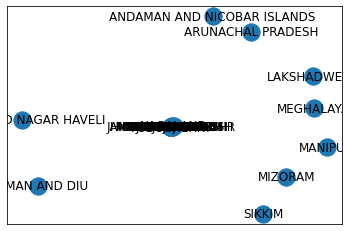

In [2]:
dfG=create()
TO_H=[]
TS=date(2019,2,14)
TE=date(2021,6,25)                                 #Actual date here
for index,row in df.iterrows():   
    print(row[2])
    x=row[20]
    x=x.strip('][').split(',')
    y=[]
    for i in range(1,len(x),2):
        var=x[i].strip(" '").upper()
        if var not in y:
            y.append(var)
        else:
            pass
    print(y)
    if "TELANGANA" in y:
        if "ANDHRA PRADESH" in y:
            y.remove("TELANGANA")
        else:
            dunno=y.index("TELANGANA")
            y[dunno]="ANDHRA PRADESH"


    temp=[]
    for i in y:
        try:
            temp.append(dic[i])
        except KeyError:
            if i =="TELANGANA":
                #temp.append(dic("ANDHRA PRADESH"))

                if "ANDHRA PRADESH" in y:
                    y.remove(i)
                else:
                    dunno=y.index("TELANGANA")
                    y[dunno]="ANDHRA PRADESH"
                    #print(y)
                    temp.append(dic["ANDHRA PRADESH"])
    lis=[sum(temp[(i):len(temp)]) for i in range(len(y))]

    capacity=checkruns_weight(row)
    for i in range(len(y)-1):
        for j in range(i+1,len(y)):
            if (i==0):
                den=lis[i]-temp[i]          #Temp is the mig inside of i and and lis is from i to len(y)
                test=y[i]
                test=temp[j]
                dfG[y[i]][y[j]]+=temp[j]*capacity/den
                #TO_H.append([y[i],y[j],dfG[y[i]][y[j]]])
            else:
                den2=lis[i]-temp[i]
                mult1=capacity*temp[i]/lis[i]
                mult2=temp[j]/den2
                dfG[y[i]][y[j]]+=mult1*mult2
                #TO_H.append([y[i],y[j],dfG[y[i]][y[j]]])

G=nx.from_pandas_adjacency(dfG)
nx.write_gml(G,str(TS)+"_2M.gml")
nx.write_edgelist(G,str(TS)+"_2M.csv",delimiter=",")
nx.draw_networkx(G)


In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
dfG

,ANDAMAN AND NICOBAR ISLANDS,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHHATTISGARH,DADRA AND NAGAR HAVELI,DAMAN AND DIU,GOA,GUJARAT,HARYANA,HIMACHAL PRADESH,JAMMU AND KASHMIR,JHARKHAND,KARNATAKA,KERALA,LAKSHADWEEP,MADHYA PRADESH,MAHARASHTRA,MANIPUR,MEGHALAYA,MIZORAM,NAGALAND,ODISHA,PUDUCHERRY,PUNJAB,RAJASTHAN,TAMIL NADU,TRIPURA,UTTAR PRADESH,UTTARAKHAND,WEST BENGAL,DELHI NCT,SIKKIM
ANDAMAN AND NICOBAR ISLANDS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ANDHRA PRADESH,0,0,0,22091,112321,0,57466,0,0,51110,42638,0,0,0,46210,985450,157514,0,111889,1054593,0,0,0,0,717734,38905,0,25560,425328,4380,172745,0,297873,116942,0
ARUNACHAL PRADESH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASSAM,0,9561,0,0,412722,0,0,0,0,0,124,0,0,0,17240,1931,105,0,5650,862,0,0,0,0,2248,0,0,23,441,32359,31429,0,439885,29055,0
BIHAR,0,96007,0,223306,0,33390,163310,0,0,260,56661,20057,0,71298,3333624,30057,12148,0,415281,269680,0,0,0,3,132825,0,139495,198059,16481,107415,3186741,284978,2642278,397544,0
CHANDIGARH,0,0,0,0,728,0,0,0,0,0,0,560540,1219,0,0,0,0,0,0,0,0,0,0,0,0,0,549,2462,0,0,17140,6548,0,0,0
CHHATTISGARH,0,30035,0,3,56643,0,0,0,0,0,23617,2306,0,3956,41578,35,664,0,494978,403206,0,0,0,0,337729,0,10328,11402,4436,34,66540,11884,142883,34863,0
DADRA AND NAGAR HAVELI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DAMAN AND DIU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GOA,0,2209,0,0,0,0,0,0,0,0,1400,0,0,0,0,181716,1100,0,343,950214,0,0,0,0,150,0,0,0,362,0,102,0,528,128,0


In [4]:
df1 = pd.read_csv('Statelatlong.csv',header = None , names =['node', 'latitude', 'longitude'])
lis=[]
for ind in df1.index:
    df1.loc[ind, ('node')]=df1['node'][ind].upper()
    
    lis.append(df1['node'][ind].upper())
lis
lis2=list(G.nodes())
for i in list(G.nodes()):
    temp=df1.loc[df1['node'] == i]
    try:
        G.nodes[i]["longitude"]=temp.iloc[0]["longitude"]
        G.nodes[i]["latitude"]=temp.iloc[0]["latitude"]
    except:
        pass
G.nodes.data()

NodeDataView({'ANDAMAN AND NICOBAR ISLANDS': {'longitude': 92.6586, 'latitude': 11.7401}, 'ANDHRA PRADESH': {'longitude': 83.2185, 'latitude': 17.6868}, 'ARUNACHAL PRADESH': {'longitude': 93.6053, 'latitude': 27.0844}, 'ASSAM': {'longitude': 91.7898, 'latitude': 26.1433}, 'BIHAR': {'longitude': 85.1376, 'latitude': 25.5941}, 'CHANDIGARH': {'longitude': 76.7794, 'latitude': 30.7333}, 'CHHATTISGARH': {'longitude': 81.6296, 'latitude': 21.2514}, 'DADRA AND NAGAR HAVELI': {}, 'DAMAN AND DIU': {}, 'GOA': {'longitude': 74.124, 'latitude': 15.2993}, 'GUJARAT': {'longitude': 72.6369, 'latitude': 23.2156}, 'HARYANA': {'longitude': 76.6066, 'latitude': 28.8955}, 'HIMACHAL PRADESH': {'longitude': 77.1734, 'latitude': 31.1048}, 'JAMMU AND KASHMIR': {'longitude': 74.7973, 'latitude': 34.0837}, 'JHARKHAND': {'longitude': 85.3096, 'latitude': 23.3441}, 'KARNATAKA': {'longitude': 77.5946, 'latitude': 12.9716}, 'KERALA': {'longitude': 76.9366, 'latitude': 8.5241}, 'LAKSHADWEEP': {'longitude': 72.64, 'l

In [5]:
nx.write_gml(G,"Post_Cov_Mig_T.gml")

In [13]:
lis=list(G.edges(data="weight"))


In [4]:
lis2=[]
for row in lis:
    lis2.append([row[0],row[1],row[2]])
lis2

TypeError: 'int' object is not subscriptable

In [5]:
temp=pd.DataFrame(lis2)
temp.to_csv("FROM_MH2021.csv")

In [6]:
len(list(G.edges()))

218

In [7]:
dfG

,ANDAMAN AND NICOBAR ISLANDS,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHHATTISGARH,DADRA AND NAGAR HAVELI,DAMAN AND DIU,GOA,GUJARAT,HARYANA,HIMACHAL PRADESH,JAMMU AND KASHMIR,JHARKHAND,KARNATAKA,KERALA,LAKSHADWEEP,MADHYA PRADESH,MAHARASHTRA,MANIPUR,MEGHALAYA,MIZORAM,NAGALAND,ODISHA,PUDUCHERRY,PUNJAB,RAJASTHAN,TAMIL NADU,TRIPURA,UTTAR PRADESH,UTTARAKHAND,WEST BENGAL,DELHI NCT,SIKKIM
ANDAMAN AND NICOBAR ISLANDS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ANDHRA PRADESH,0,0,0,22091,112321,0,57466,0,0,51110,42638,0,0,0,46210,985450,157514,0,111889,1054593,0,0,0,0,717734,38905,0,25560,425328,4380,172745,0,297873,116942,0
ARUNACHAL PRADESH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASSAM,0,9561,0,0,412722,0,0,0,0,0,124,0,0,0,17240,1931,105,0,5650,862,0,0,0,0,2248,0,0,23,441,32359,31429,0,439885,29055,0
BIHAR,0,96007,0,223306,0,33390,163310,0,0,260,56661,20057,0,71298,3333624,30057,12148,0,415281,269680,0,0,0,3,132825,0,139495,198059,16481,107415,3186741,284978,2642278,397544,0
CHANDIGARH,0,0,0,0,728,0,0,0,0,0,0,560540,1219,0,0,0,0,0,0,0,0,0,0,0,0,0,549,2462,0,0,17140,6548,0,0,0
CHHATTISGARH,0,30035,0,3,56643,0,0,0,0,0,23617,2306,0,3956,41578,35,664,0,494978,403206,0,0,0,0,337729,0,10328,11402,4436,34,66540,11884,142883,34863,0
DADRA AND NAGAR HAVELI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DAMAN AND DIU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GOA,0,2209,0,0,0,0,0,0,0,0,1400,0,0,0,0,181716,1100,0,343,950214,0,0,0,0,150,0,0,0,362,0,102,0,528,128,0


In [8]:
c=1
for index, row in dfG.iterrows():
    print(row[1])
    c+=1
    if(c==5):
        break

0
0
0
9561


In [9]:
print(dfG)

                             ANDAMAN AND NICOBAR ISLANDS  ANDHRA PRADESH  \
ANDAMAN AND NICOBAR ISLANDS                            0               0   
ANDHRA PRADESH                                         0               0   
ARUNACHAL PRADESH                                      0               0   
ASSAM                                                  0            9561   
BIHAR                                                  0           96007   
CHANDIGARH                                             0               0   
CHHATTISGARH                                           0           30035   
DADRA AND NAGAR HAVELI                                 0               0   
DAMAN AND DIU                                          0               0   
GOA                                                    0            2209   
GUJARAT                                                0           30427   
HARYANA                                                0           17600   
HIMACHAL PRA

In [12]:
TO_H=[]
lis=list(dic.keys())
for origin in lis:
    for destination in lis:
        TO_H.append([origin, destination, dfG[origin][destination]])
dfH=pd.DataFrame(TO_H)
#dfH.to_csv(str(TS)+"_2M.csv")
dfH.to_csv("Net.csv")
dfH

,0,1,2
0,ANDAMAN AND NICOBAR ISLANDS,ANDAMAN AND NICOBAR ISLANDS,0
1,ANDAMAN AND NICOBAR ISLANDS,ANDHRA PRADESH,0
2,ANDAMAN AND NICOBAR ISLANDS,ARUNACHAL PRADESH,0
3,ANDAMAN AND NICOBAR ISLANDS,ASSAM,0
4,ANDAMAN AND NICOBAR ISLANDS,BIHAR,0
5,ANDAMAN AND NICOBAR ISLANDS,CHANDIGARH,0
6,ANDAMAN AND NICOBAR ISLANDS,CHHATTISGARH,0
7,ANDAMAN AND NICOBAR ISLANDS,DADRA AND NAGAR HAVELI,0
8,ANDAMAN AND NICOBAR ISLANDS,DAMAN AND DIU,0
9,ANDAMAN AND NICOBAR ISLANDS,GOA,0


In [11]:
TO_H=[]
lis=list(dic.keys())
for origin in lis:
    for destination in lis:
        if origin=="MAHARASHTRA":
            TO_H.append([origin, destination, dfG[origin][destination]])
dfH=pd.DataFrame(TO_H)
#dfH.to_csv(str(TS)+"_2M.csv")
dfH.to_csv("Feb_may_MH.csv")
dfH

,0,1,2
0,MAHARASHTRA,ANDAMAN AND NICOBAR ISLANDS,0
1,MAHARASHTRA,ANDHRA PRADESH,1054593
2,MAHARASHTRA,ARUNACHAL PRADESH,0
3,MAHARASHTRA,ASSAM,862
4,MAHARASHTRA,BIHAR,269680
5,MAHARASHTRA,CHANDIGARH,0
6,MAHARASHTRA,CHHATTISGARH,403206
7,MAHARASHTRA,DADRA AND NAGAR HAVELI,0
8,MAHARASHTRA,DAMAN AND DIU,0
9,MAHARASHTRA,GOA,950214
